<a href="https://colab.research.google.com/github/seifah1234/ML-Projects/blob/main/Titanic_preprocessing_practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. Load Libraries
 We start by importing the required Python libraries for data analysis and visualization.

*  **pandas** for data handling
*  **matplotlib** and **seaborn** for visualizations

We also set a clean seaborn style for better-looking plots.

In [61]:
from google.colab import files
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc

sns.set(style="whitegrid", palette="pastel")

## 2. Upload and Load Dataset
Since we are using Google Colab, we first upload the Titanic dataset file.
We then read it into a pandas DataFrame, preview its shape, the first few rows, and check general information about columns and data types.

In [39]:

print("📤 Please upload TitanicDataset.csv")
uploaded = files.upload()

df = pd.read_csv("TitanicDataset.csv")
print(df.head())

print("Data Shape: \n", df.shape)
print("Data Info: \n", df.info())

📤 Please upload TitanicDataset.csv


Saving TitanicDataset.csv to TitanicDataset (2).csv
   PassengerId  Survived  Pclass  \
0          892         0       3   
1          893         1       3   
2          894         0       2   
3          895         0       3   
4          896         1       3   

                                           Name     Sex   Age  SibSp  Parch  \
0                              Kelly, Mr. James    male  34.5      0      0   
1              Wilkes, Mrs. James (Ellen Needs)  female  47.0      1      0   
2                     Myles, Mr. Thomas Francis    male  62.0      0      0   
3                              Wirz, Mr. Albert    male  27.0      0      0   
4  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female  22.0      1      1   

    Ticket     Fare Cabin Embarked  
0   330911   7.8292   NaN        Q  
1   363272   7.0000   NaN        S  
2   240276   9.6875   NaN        Q  
3   315154   8.6625   NaN        S  
4  3101298  12.2875   NaN        S  
Data Shape: 
 (418, 12)
<class 'pa

## 3. Missing Values Overview
We check for missing values in each column, sort them in descending order, and plot them as a bar chart to quickly identify which features require imputation or cleaning.

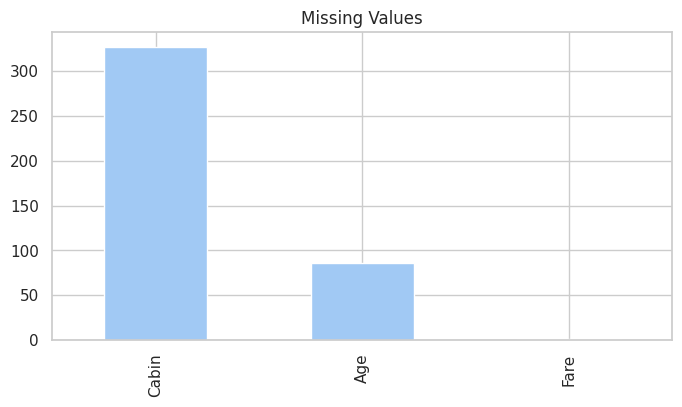

In [40]:
missing = df.isnull().sum()
missing = missing[missing > 0]
missing.sort_values(ascending=False).plot(kind='bar', figsize=(8,4))
plt.title("Missing Values")
plt.show()

## 4. Target Variable Distribution
We explore the target variable **Survived** to see how many passengers survived vs. did not survive.

We use both a countplot for raw counts and a pie chart for percentage distribution.

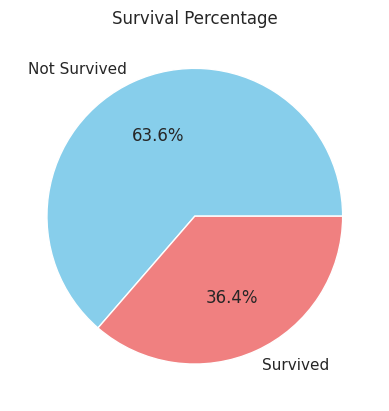

In [41]:
df['Survived'].value_counts().plot.pie(
    autopct='%1.1f%%', colors=['skyblue','lightcoral'], labels=['Not Survived','Survived']
)
plt.title('Survival Percentage')
plt.ylabel('')
plt.show()

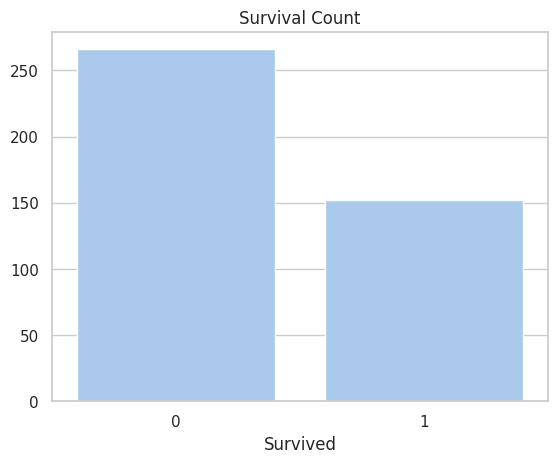

In [42]:
plt.figure()
sns.countplot(x="Survived", data=df)
plt.title('Survival Count')
plt.ylabel('')
plt.show()

## 5. Survival by Sex
We compare survival counts between male and female passengers using a countplot with a hue on 'Survived'.

This helps us see the strong relationship between gender and survival rates.

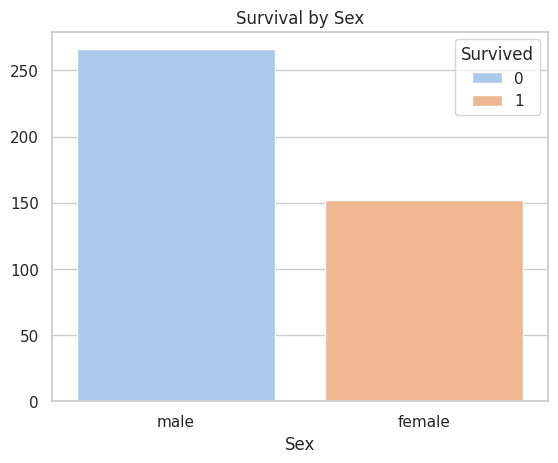

In [43]:
plt.figure()
sns.countplot(x="Sex", hue="Survived", data=df)
plt.title('Survival by Sex')
plt.ylabel('')
plt.show()

## 6. Survival by Passenger Class
We examine how passenger class (1st, 2nd, 3rd) affected survival rates.
Higher classes are often associated with higher survival chances.

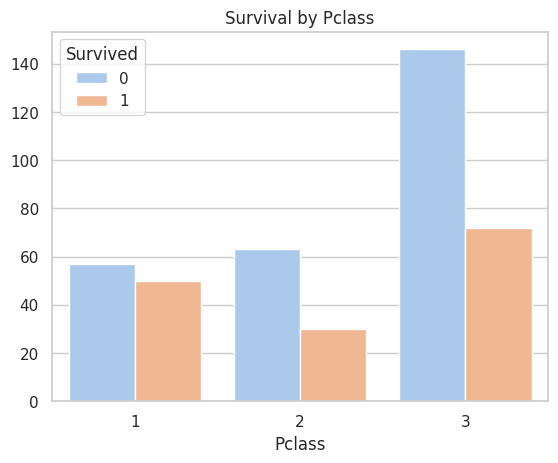

In [44]:
plt.figure()
sns.countplot(x="Pclass", hue="Survived", data=df)
plt.title('Survival by Pclass')
plt.ylabel('')
plt.show()

## 7. Age Distribution
We plot the distribution of passenger ages using a histogram and KDE curve, and also use a boxplot to compare the age distribution between survivors and non-survivors.

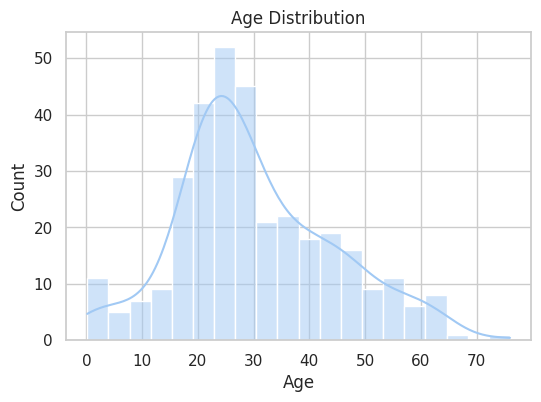

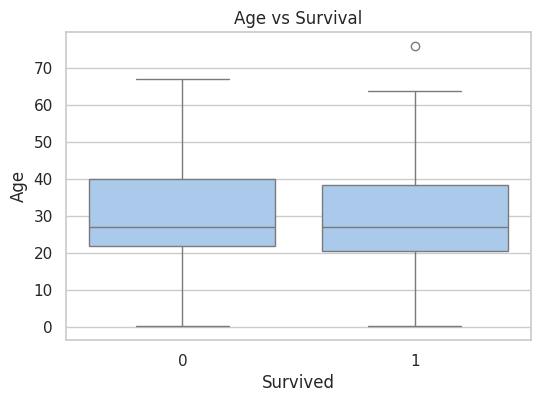

In [45]:
plt.figure(figsize=(6,4))
sns.histplot(df['Age'].dropna(), bins=20, kde=True)
plt.title("Age Distribution")
plt.show()

plt.figure(figsize=(6,4))
sns.boxplot(x="Survived", y="Age", data=df)
plt.title("Age vs Survival")
plt.show()

## 8. Fare Distribution
We plot fare prices using a histogram (often skewed) and compare fare distributions between survivors and non-survivors using a boxplot to see if ticket price influenced survival.


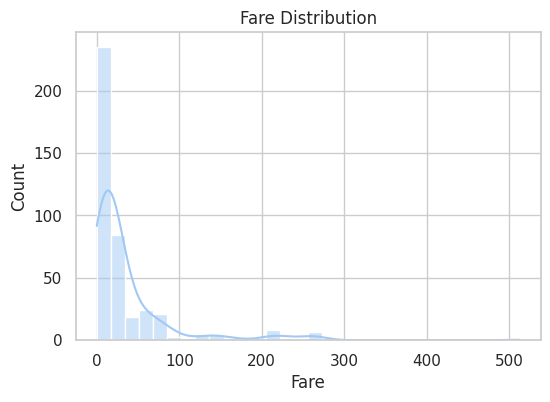

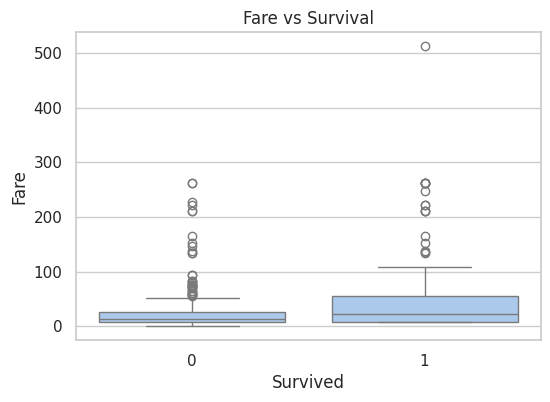

In [46]:
plt.figure(figsize=(6,4))
sns.histplot(df['Fare'], bins=30, kde=True)
plt.title("Fare Distribution")
plt.show()

plt.figure(figsize=(6,4))
sns.boxplot(x="Survived", y="Fare", data=df)
plt.title("Fare vs Survival")
plt.show()

## 9. Survival by Embarked Port
We analyze how the port of embarkation (C, Q, S) influenced survival.

This can reflect social and economic factors tied to boarding locations.


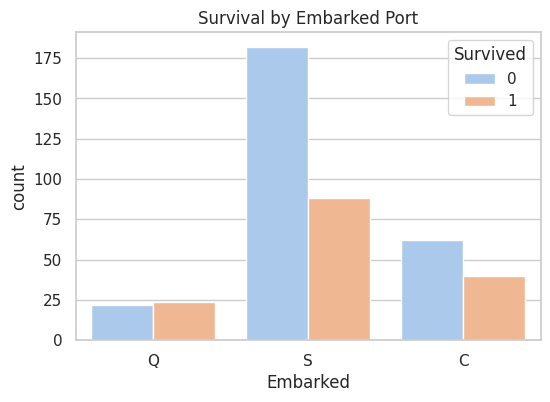

In [47]:
plt.figure(figsize=(6,4))
sns.countplot(x="Embarked", hue="Survived", data=df)
plt.title("Survival by Embarked Port")
plt.show()

## 10. Age Group Survival
We categorize passengers into **Child (<18)**, **Adult (18–50)**, and **Elderly (>50)** age groups, and compare survival rates between these groups.

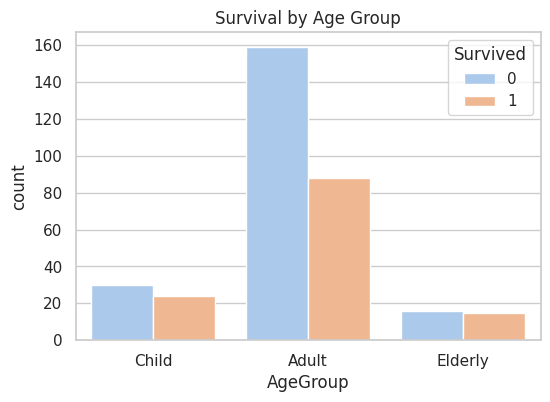

In [48]:
bins = [0, 18, 50, 80]
labels = ['Child', 'Adult', 'Elderly']
df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels)

plt.figure(figsize=(6,4))
sns.countplot(x="AgeGroup", hue="Survived", data=df)
plt.title("Survival by Age Group")
plt.show()

## 11. Outlier Detection

We use boxplots to detect potential outliers in numerical columns like **Age** and **Fare**.

Outliers can influence statistical analysis and model training.

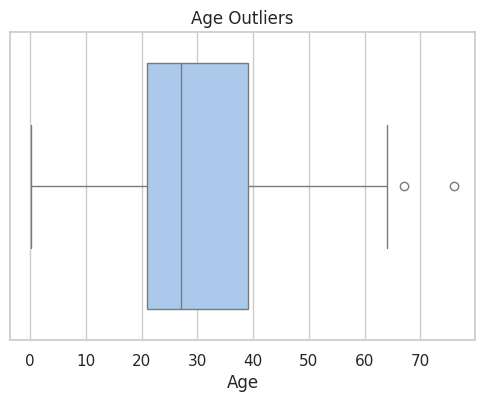

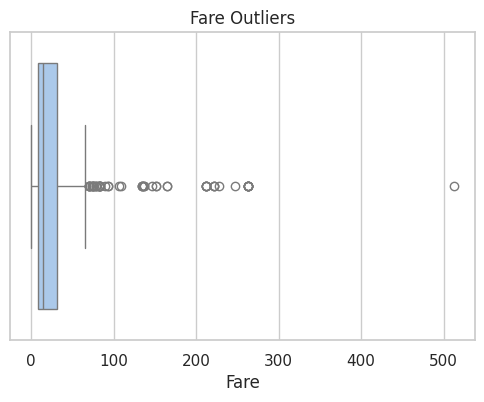

In [49]:
plt.figure(figsize=(6,4))
sns.boxplot(x=df['Age'])
plt.title("Age Outliers")
plt.show()

plt.figure(figsize=(6,4))
sns.boxplot(x=df['Fare'])
plt.title("Fare Outliers")
plt.show()

## 12. Handling Missing Data

We get the mean of the age and get the mode of Embarked and fill missing data with them in their columns.

We droped the uneccessary columns from the data frame.

In [50]:
df['Age'] = df['Age'].fillna(df['Age'].mean())
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode())
df.drop(['Cabin', 'Name', 'Ticket', 'PassengerId', 'AgeGroup'], axis=1, inplace=True)
df.dropna(inplace=True)

## 13. Check Duplicates

In [51]:
print(df.duplicated().sum())
df.drop_duplicates(inplace=True)

38


## 14. Handle the Categorical Data

We use the Label encode to encode the categorical data to numercial

In [52]:
encoder = LabelEncoder()

df['Sex'] = encoder.fit_transform(df['Sex'])
df['Embarked'] = encoder.fit_transform(df['Embarked'])

## 15. Standardize and split The Data

We make standardization for the data to make the training easy yot model

In [53]:
scaler = StandardScaler()

In [54]:
X = df.drop(['Survived'], axis=1)
X = scaler.fit_transform(X)
y = df['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## 16. Train the model

In [55]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

## 17. Predict the test data

In [62]:
y_pred = model.predict(X_test)
y_pred_train = model.predict(X_train)
y_pred_proba = model.predict_proba(X_test)[:,1]


## 18. Calculate the accuracy

In [63]:
from sklearn.metrics import accuracy_score

acc = accuracy_score(y_test, y_pred) * 100
acc_train = accuracy_score(y_train, y_pred_train) * 100

print(f"Logistic Regression model Train accuracy: {acc_train:.2f}%")
print(f"Logistic Regression model accuracy: {acc:.2f}%")


Logistic Regression model Train accuracy: 100.00%
Logistic Regression model accuracy: 100.00%


## 19. Visualize the predicted data

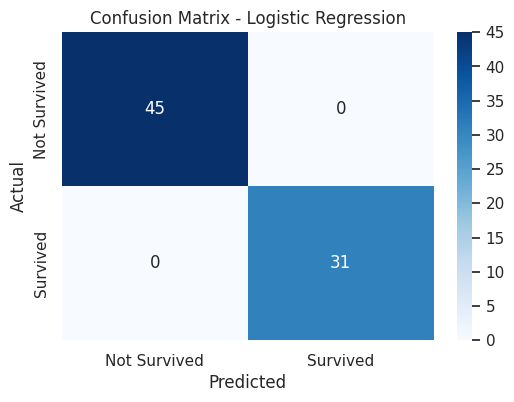

In [64]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Not Survived", "Survived"], yticklabels=["Not Survived", "Survived"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Logistic Regression")
plt.show()

In [65]:
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        45
           1       1.00      1.00      1.00        31

    accuracy                           1.00        76
   macro avg       1.00      1.00      1.00        76
weighted avg       1.00      1.00      1.00        76



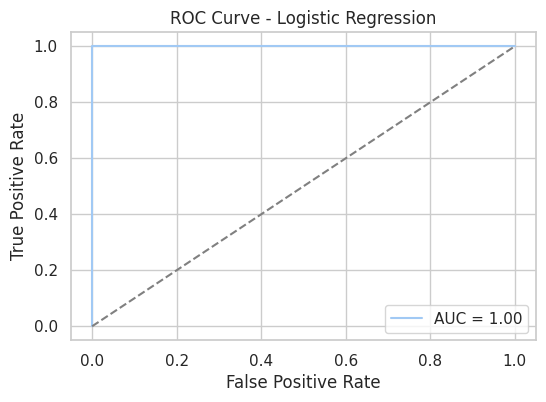

In [66]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
plt.plot([0,1],[0,1],'--', color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Logistic Regression")
plt.legend()
plt.show()